In [1]:
#-----------------------------------------------------------------------
# pls god just graph my data and save it :(
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
csv_file = './data/diag_flow10to1000bidders_10step_200000trials.csv'
title = 'Pure Diagonal Flow'
df = pd.read_csv(csv_file)

In [39]:
num_bidders = df['num bidders']
avg_revs = df['avg rev']
min_bidders = int(num_bidders[0])
max_bidders = int(num_bidders[len(num_bidders)-1])
bidder_step = int(num_bidders[1] - num_bidders[0])

<Figure size 648x360 with 0 Axes>

Text(0.5, 1.0, 'Pure Diagonal Flow')

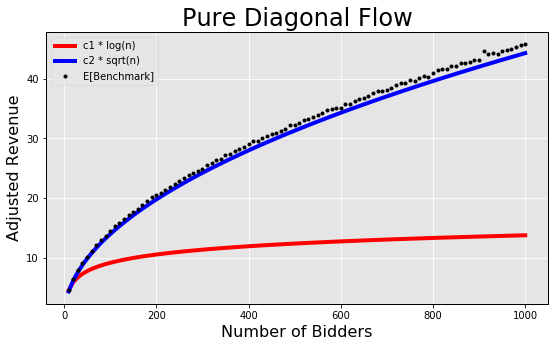

In [41]:
# plot the results
log_bench = [2*np.log(n) for n in num_bidders]
sqrt_bench = [1.4*np.sqrt(n) for n in num_bidders]

plt1 = plt.style.use('ggplot')
plt.figure(figsize=(9,5))
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black'}):
    plt.plot(num_bidders, log_bench, 'r-',
        num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_revs,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c1 * log(n)', 'c2 * sqrt(n)', 'E[Benchmark]'])
plt.title(title, fontsize = 24)
xlab = plt.xlabel('Number of Bidders', fontsize=16)
ylab = plt.ylabel('Adjusted Revenue', fontsize=16)
xlab.set_color('black')
ylab.set_color('black')



# ggsave(filename=figure_name,
#        plot=plt1,
#        device='png', dpi = 200)

In [31]:
# For fitting y = B + A log x, just fit y against (log x)
# For fitting y = B + A sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), avg_revs, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), avg_revs, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

log fit: 
a = 11.085011610443914 
b = -35.10718996933075 
error = 848.052483873774

sqrt fit: 
a = 1.4462042817186154 
b = 0.029532983000655412 
error = 2.548089064563692
